In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [22]:
# Using the direct download link for the CSV file
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1JovczDLxRgvbAmjM0l7XRRmXFivXOCfw')

In [23]:
df['City'].unique()

array(['Thiruvananthapuram', 'Nashik', 'Bhagalpur', 'Chennai', 'Amritsar',
       'Ahmedabad', 'New Delhi', 'Port Blair', 'Bhopal', 'Jagdalpur',
       'Vadodara', 'Chandigarh', 'Champhai', 'Korba', 'Kolkata', 'Gaya',
       'Jorethang', 'Silvassa', 'Kanpur', 'Nagpur', 'Bhubaneswar',
       'Ambassa', 'Jorhat', 'Diglipur', 'Salem', 'Durg', 'Churachandpur',
       'Kottayam', 'Varanasi', 'Imphal', 'Belgaum', 'Agra', 'Durgapur',
       'Daman', 'Bilaspur', 'Nellore', 'Patiala', 'Jabalpur', 'Mapusa',
       'Agartala', 'Aurangabad', 'Gurugram', 'Vijayawada', 'Kavaratti',
       'Bokaro', 'Siliguri', 'Udaipur', 'Nongstoin', 'Tirupati',
       'Jamshedpur', 'Ludhiana', 'Aizawl', 'Raipur', 'Naharlagun',
       'Trichur', 'Kohima', 'Ambala', 'Hisar', 'Nizamabad', 'Dibrugarh',
       'Karimnagar', 'Jodhpur', 'Khammam', 'Jaipur', 'Wokha', 'Mysore',
       'Hyderabad', 'Kota', 'Tawang', 'Ziro', 'Shimla', 'Kolasib',
       'West Delhi', 'Vasco da Gama', 'Namchi', 'Thoubal', 'Tura', 'Pune',
      

In [25]:
label_encoder = LabelEncoder()
df['Account_Type']=label_encoder.fit_transform(df['Account_Type'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Transaction_Type']=label_encoder.fit_transform(df['Transaction_Type'])
df['Merchant_Category']=label_encoder.fit_transform(df['Merchant_Category'])
df['Device_Type']=label_encoder.fit_transform(df['Device_Type'])


In [26]:
df['Transaction_Device'].unique()

array(['Voice Assistant', 'POS Mobile Device', 'ATM', 'POS Mobile App',
       'Virtual Card', 'Mobile Device', 'Payment Gateway Device',
       'Debit/Credit Card', 'Bank Branch', 'Desktop/Laptop',
       'Self-service Banking Machine', 'ATM Booth Kiosk',
       'Biometric Scanner', 'Web Browser', 'Tablet', 'Wearable Device',
       'QR Code Scanner', 'Smart Card', 'POS Terminal', 'Banking Chatbot'],
      dtype=object)

In [27]:
df['Account_Type'].unique()

array([2, 0, 1])

# **Importing and doing EDA**


In [28]:
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,3,5,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",3,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,0,51,Maharashtra,Nashik,Nashik Branch,0,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,0,5,74622.66,POS Mobile Device,"Nashik, Maharashtra",1,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,0,3,66817.99,ATM,"Bhagalpur, Bihar",1,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,0,57,Tamil Nadu,Chennai,Chennai Branch,0,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,2,2,58177.08,POS Mobile App,"Chennai, Tamil Nadu",2,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,0,43,Punjab,Amritsar,Amritsar Branch,2,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,3,2,16108.56,Virtual Card,"Amritsar, Punjab",2,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


Dropping the unnecessary columns

In [29]:
df['Transaction_Currency'].unique()

array(['INR'], dtype=object)

Since all of the currencies are in INR, I will be dropping that column

In [30]:
df.drop(['Customer_Email','Customer_Contact','Transaction_Currency','Customer_Name','Customer_ID','Transaction_ID','Merchant_ID'],axis=1,inplace=True)

In [31]:
df.isnull().sum()

,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_Date,0
Transaction_Time,0
Transaction_Amount,0
Transaction_Type,0


In [32]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",3,0,Bitcoin transaction
1,0,51,Maharashtra,Nashik,Nashik Branch,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,POS Mobile Device,"Nashik, Maharashtra",1,0,Grocery delivery
2,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,ATM,"Bhagalpur, Bihar",1,0,Mutual fund investment
3,0,57,Tamil Nadu,Chennai,Chennai Branch,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,POS Mobile App,"Chennai, Tamil Nadu",2,0,Food delivery
4,0,43,Punjab,Amritsar,Amritsar Branch,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,Virtual Card,"Amritsar, Punjab",2,0,Debt repayment


There are no NaN values

**Performing EDA**

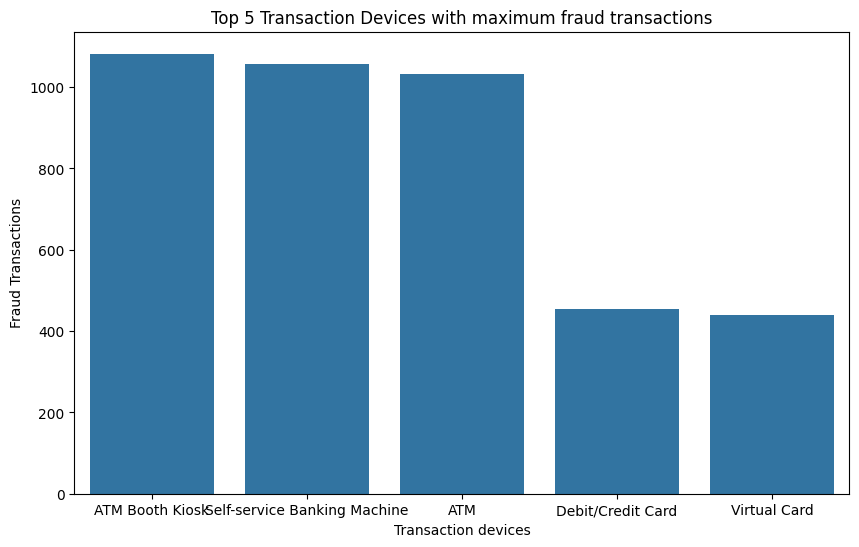

In [33]:
fd = df.groupby('Transaction_Device')['Is_Fraud'].sum().sort_values(ascending=False)
fd = fd.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=fd.index,y=fd.values)

plt.title('Top 5 Transaction Devices with maximum fraud transactions')
plt.ylabel('Fraud Transactions')
plt.xlabel('Transaction devices')
plt.show()



ATM Booth , have the most number of fraud transactions, maybe due to leaking of atm pins

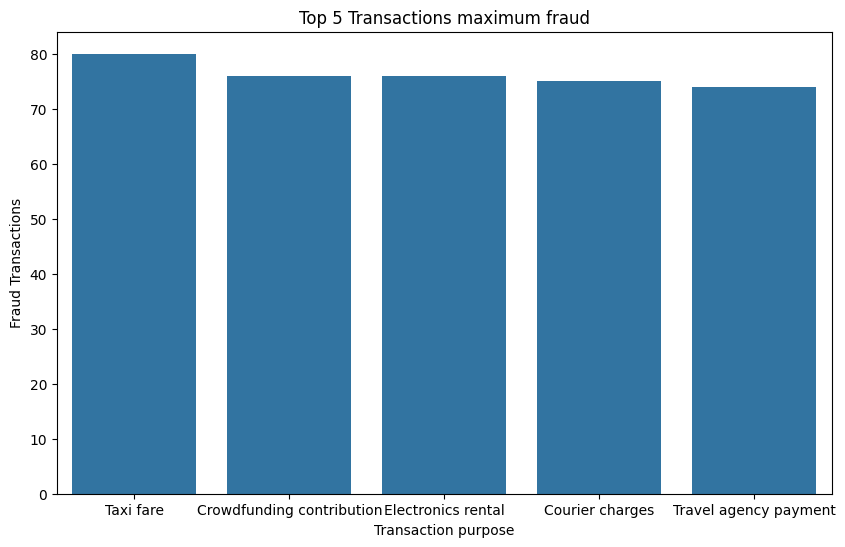

In [34]:
fd1 = df.groupby('Transaction_Description')['Is_Fraud'].sum().sort_values(ascending=False)
fd1 = fd1.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=fd1.index,y=fd1.values)
plt.title('Top 5 Transactions maximum fraud')
plt.ylabel('Fraud Transactions')
plt.xlabel('Transaction purpose')
plt.show()


Taxi Fare has most fraud transactions

<Axes: xlabel='Merchant_Category', ylabel='Is_Fraud'>

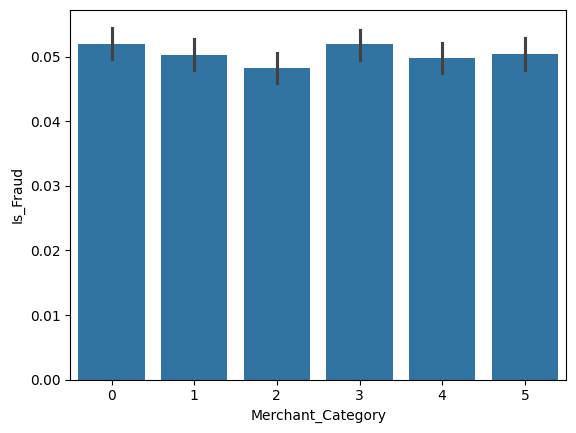

In [35]:
sns.barplot(x='Merchant_Category',y='Is_Fraud',data=df)

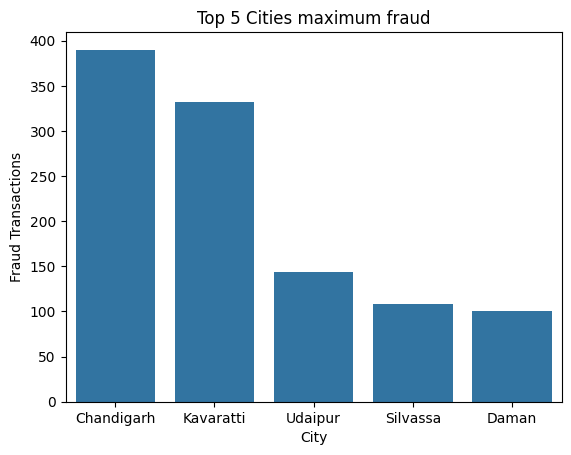

In [36]:
fd2=df.groupby('City')['Is_Fraud'].sum().sort_values(ascending=False)
fd2=fd2.head(5)
sns.barplot(x=fd2.index,y=fd2.values)
plt.title('Top 5 Cities maximum fraud')
plt.ylabel('Fraud Transactions')
plt.xlabel('City')
plt.show()


Most of the fraud transactions are from **Chandigarh**

<Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>

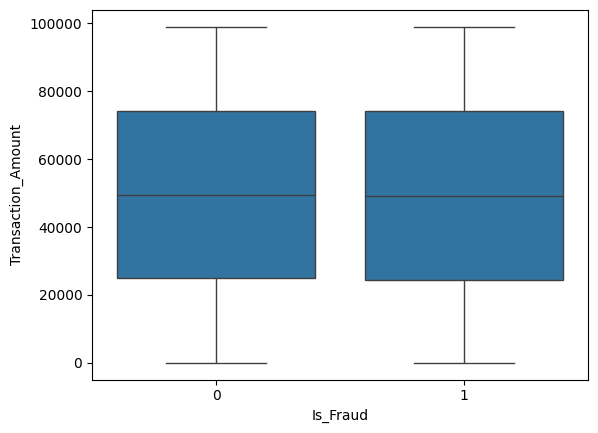

In [37]:
sns.boxplot(y='Transaction_Amount',x='Is_Fraud',data=df)

In [38]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",3,0,Bitcoin transaction
1,0,51,Maharashtra,Nashik,Nashik Branch,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,POS Mobile Device,"Nashik, Maharashtra",1,0,Grocery delivery
2,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,ATM,"Bhagalpur, Bihar",1,0,Mutual fund investment
3,0,57,Tamil Nadu,Chennai,Chennai Branch,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,POS Mobile App,"Chennai, Tamil Nadu",2,0,Food delivery
4,0,43,Punjab,Amritsar,Amritsar Branch,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,Virtual Card,"Amritsar, Punjab",2,0,Debt repayment


In [39]:
#Label Encoding the required columns
label_encoder = LabelEncoder()
df['Account_Type']=label_encoder.fit_transform(df['Account_Type'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Transaction_Type']=label_encoder.fit_transform(df['Transaction_Type'])
df['Merchant_Category']=label_encoder.fit_transform(df['Merchant_Category'])
df['Device_Type']=label_encoder.fit_transform(df['Device_Type'])


In [40]:
df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",3,0,Bitcoin transaction
1,0,51,Maharashtra,Nashik,Nashik Branch,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,POS Mobile Device,"Nashik, Maharashtra",1,0,Grocery delivery
2,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,ATM,"Bhagalpur, Bihar",1,0,Mutual fund investment
3,0,57,Tamil Nadu,Chennai,Chennai Branch,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,POS Mobile App,"Chennai, Tamil Nadu",2,0,Food delivery
4,0,43,Punjab,Amritsar,Amritsar Branch,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,Virtual Card,"Amritsar, Punjab",2,0,Debt repayment


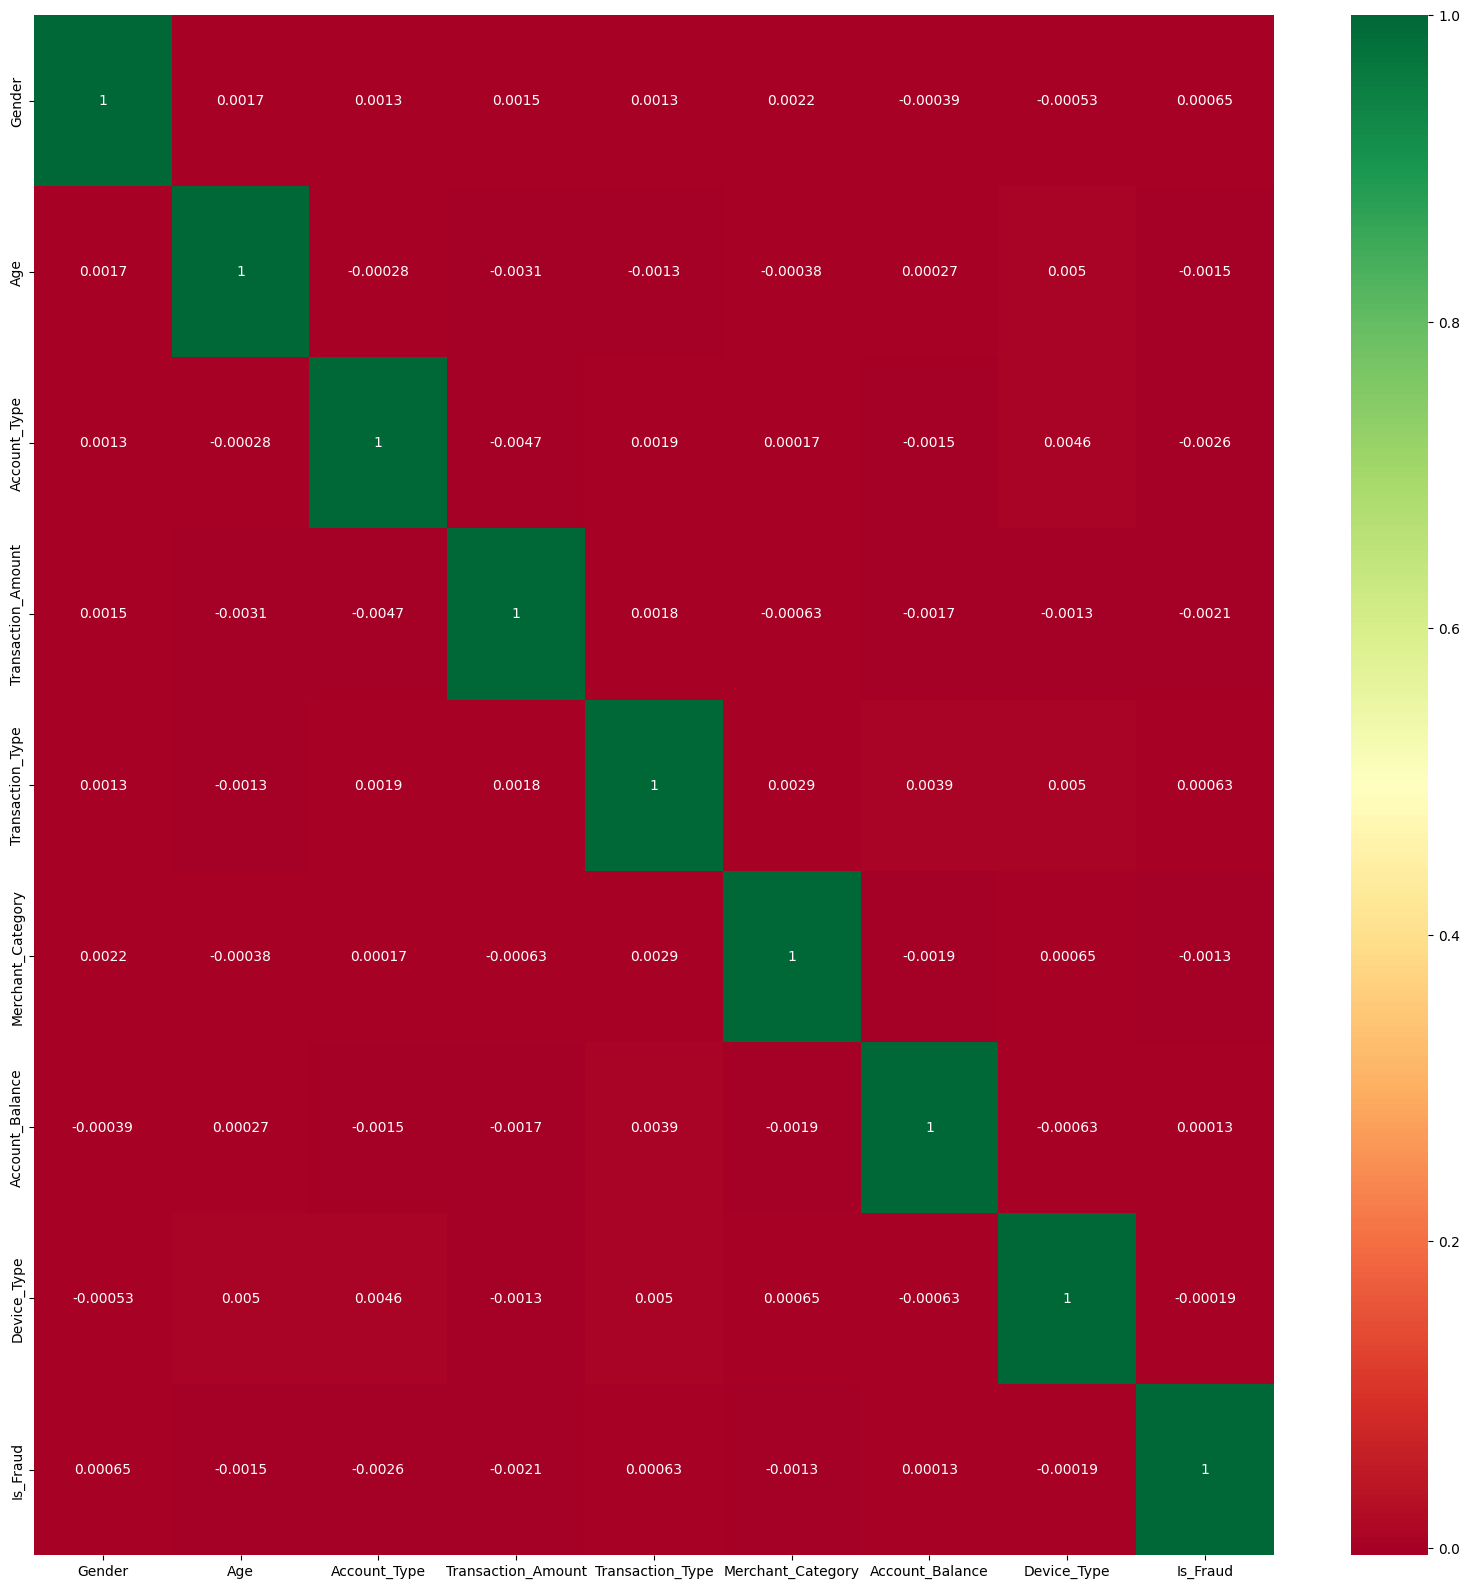

In [41]:
dfcor = df.drop(['State','City','Bank_Branch','Transaction_Date','Transaction_Time','Transaction_Device','Transaction_Location','Transaction_Description'],axis=1,inplace=False)
corrmat = dfcor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(dfcor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
#Getting Dependent and Independent features
X = df.drop(['Is_Fraud'],axis=1)
Y = df['Is_Fraud']

In [43]:
X.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Transaction_Description
0,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,23-01-2025,16:04:07,32415.45,3,5,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",3,Bitcoin transaction
1,0,51,Maharashtra,Nashik,Nashik Branch,0,11-01-2025,17:14:53,43622.60,0,5,74622.66,POS Mobile Device,"Nashik, Maharashtra",1,Grocery delivery
2,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,25-01-2025,03:09:52,63062.56,0,3,66817.99,ATM,"Bhagalpur, Bihar",1,Mutual fund investment
3,0,57,Tamil Nadu,Chennai,Chennai Branch,0,19-01-2025,12:27:02,14000.72,2,2,58177.08,POS Mobile App,"Chennai, Tamil Nadu",2,Food delivery
4,0,43,Punjab,Amritsar,Amritsar Branch,2,30-01-2025,18:30:46,18335.16,3,2,16108.56,Virtual Card,"Amritsar, Punjab",2,Debt repayment


In [44]:
City = pd.get_dummies(X['City'],drop_first=True,dtype=int) #To prevent the dummy variable trap

In [45]:
City.head()

,Agra,Ahmedabad,Aizawl,Ajmer,Ambala,Ambassa,Amritsar,Asansol,Aurangabad,Bangalore,Belgaum,Berhampur,Bhagalpur,Bhavnagar,Bhopal,Bhubaneswar,Bilaspur,Bokaro,Car Nicobar,Champhai,Chandigarh,Chennai,Churachandpur,Coimbatore,Cuttack,Daman,Dehradun,Dhanbad,Dharmanagar,Dibrugarh,Diglipur,Dimapur,Diu,Durg,Durgapur,East Delhi,Faridabad,Gangtok,Gaya,Guntur,Gurugram,Guwahati,Gwalior,Haldwani,Haridwar,Hazaribagh,Hisar,Howrah,Hubli,Hyderabad,Imphal,Indore,Itanagar,Jabalpur,Jagdalpur,Jaipur,Jalandhar,Jamshedpur,Jodhpur,Jorethang,Jorhat,Jowai,Kangpokpi,Kangra,Kanpur,Karaikal,Karimnagar,Kavaratti,Khammam,Kochi,Kohima,Kolasib,Kolkata,Korba,Kota,Kottayam,Kozhikode,Kullu,Lucknow,Ludhiana,Lunglei,Madurai,Mahe,Manali,Mangalore,Mangan,Mapusa,Margao,Meerut,Mokokchung,Mumbai,Munger,Muzaffarpur,Mysore,Nagaon,Nagpur,Naharlagun,Nainital,Namchi,Nashik,Nellore,New Delhi,Nizamabad,Nongstoin,North Delhi,Panaji,Patiala,Patna,Port Blair,Puducherry,Pune,Raipur,Rajkot,Ranchi,Rishikesh,Rourkela,Salem,Sambalpur,Shillong,Shimla,Silchar,Siliguri,Silvassa,South Delhi,Surat,Tawang,Thiruvananthapuram,Thoubal,Tirupati,Trichur,Trichy,Tura,Udaipur,Ujjain,Vadodara,Varanasi,Vasco da Gama,Vijayawada,Visakhapatnam,Warangal,West Delhi,Wokha,Yanam,Ziro
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
Gender = pd.get_dummies(X['Gender'],drop_first=True,dtype=int)

In [47]:
Gender.head()

,1
0,1
1,0
2,1
3,0
4,0


In [48]:
X.drop(['Gender','City'],axis=1,inplace=True)

In [49]:
#One-hot encoding
State = pd.get_dummies(X['State'],drop_first=True,dtype=int)
Bank_Branch = pd.get_dummies(X['Bank_Branch'],drop_first=True,dtype=int)
Transaction_Device=pd.get_dummies(X['Transaction_Device'],drop_first=True,dtype=int)
Transaction_Location = pd.get_dummies(X['Transaction_Location'],drop_first=True,dtype=int)
Transaction_Description = pd.get_dummies(X['Transaction_Description'],drop_first=True,dtype=int)
X.drop(['State','Bank_Branch','Transaction_Device','Transaction_Location','Transaction_Description'],axis=1,inplace=True)

In [50]:
X=pd.concat([X,State,Bank_Branch,Transaction_Device,Transaction_Location,Transaction_Description,City,Gender],axis=1)

In [51]:
X.columns = X.columns.astype(str)

In [81]:
X_train_ns.head()

,Age,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, Andhra Pradesh","Gurugram, Haryana","Guwahati, Assam","Gwa

In [52]:
X.head()

,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, An

In [53]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y', errors='coerce')
dates= df['Transaction_Date']


In [54]:
# Extract the day and store it in a new series
transaction_day = dates.dt.day
transaction_month = dates.dt.month
transaction_year = dates.dt.year
X = pd.concat([X,transaction_day,transaction_month,transaction_year],axis=1)
X.head()

,Age,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, An

In [55]:
X.drop(['Transaction_Date'],axis=1,inplace=True)

In [56]:
X = pd.concat([X,transaction_day.rename('transaction_day'),transaction_month.rename('transaction_month'),transaction_year.rename('transaction_year')],axis=1)

In [57]:
X.head()

,Age,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, Andhra Pradesh","Gu

In [58]:
times = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S', errors='coerce')
transaction_hour = times.dt.hour
transaction_minute = times.dt.minute
transaction_second = times.dt.second

In [59]:
transaction_hour.head()

,Transaction_Time
0,16
1,17
2,3
3,12
4,18


In [60]:
X.drop(['Transaction_Time'],axis=1,inplace=True)

In [61]:
X = pd.concat([X,transaction_hour.rename('transaction_hour'),transaction_minute.rename('transaction_minute'),transaction_second.rename('transaction_second')],axis=1)

In [62]:
X.drop(['Chandigarh','Puducherry'],axis=1,inplace=True) #dropping the duplicate columns, due to one-hot encoding

In [63]:
X.head()

,Age,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, Andhra Pradesh","Gurugram, Haryana","Guwahati, Assam","Gwa

# **Implementing XGBoost**

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,stratify=Y,test_size=0.5,shuffle=True)

In [41]:
y_train.value_counts()

,count
Is_Fraud,
0,94956
1,5044


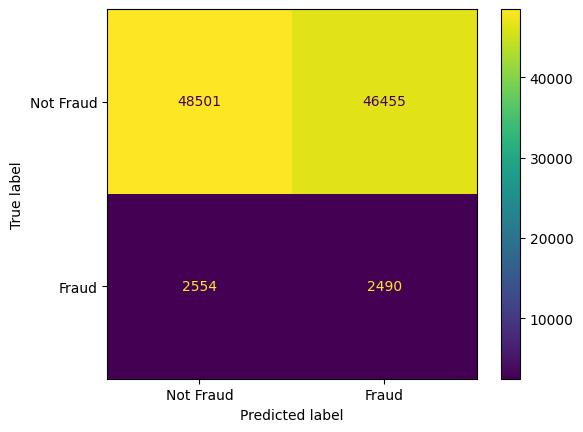

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train_ns,y_train_ns)
ConfusionMatrixDisplay.from_estimator(clf2,X_test,y_test,display_labels=["Not Fraud","Fraud"])

In [ ]:
classifier = xgb.XGBClassifier()

In [65]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(sampling_strategy=1)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

In [66]:
X_train_ns.columns

Index(['Age', 'Account_Type', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Device_Type', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam',
       ...
       'Wokha', 'Yanam', 'Ziro', '1', 'transaction_day', 'transaction_month',
       'transaction_year', 'transaction_hour', 'transaction_minute',
       'transaction_second'],
      dtype='object', length=668)

In [45]:
X_train_ns.head()

,Age,Account_Type,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Device_Type,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Agra Branch,Ahmedabad Branch,Aizawl Branch,Ajmer Branch,Ambala Branch,Ambassa Branch,Amritsar Branch,Asansol Branch,Aurangabad Branch,Bangalore Branch,Belgaum Branch,Berhampur Branch,Bhagalpur Branch,Bhavnagar Branch,Bhopal Branch,Bhubaneswar Branch,Bilaspur Branch,Bokaro Branch,Car Nicobar Branch,Champhai Branch,Chandigarh Branch,Chennai Branch,Churachandpur Branch,Coimbatore Branch,Cuttack Branch,Daman Branch,Dehradun Branch,Dhanbad Branch,Dharmanagar Branch,Dibrugarh Branch,Diglipur Branch,Dimapur Branch,Diu Branch,Durg Branch,Durgapur Branch,East Delhi Branch,Faridabad Branch,Gangtok Branch,Gaya Branch,Guntur Branch,Gurugram Branch,Guwahati Branch,Gwalior Branch,Haldwani Branch,Haridwar Branch,Hazaribagh Branch,Hisar Branch,Howrah Branch,Hubli Branch,Hyderabad Branch,Imphal Branch,Indore Branch,Itanagar Branch,Jabalpur Branch,Jagdalpur Branch,Jaipur Branch,Jalandhar Branch,Jamshedpur Branch,Jodhpur Branch,Jorethang Branch,Jorhat Branch,Jowai Branch,Kangpokpi Branch,Kangra Branch,Kanpur Branch,Karaikal Branch,Karimnagar Branch,Kavaratti Branch,Khammam Branch,Kochi Branch,Kohima Branch,Kolasib Branch,Kolkata Branch,Korba Branch,Kota Branch,Kottayam Branch,Kozhikode Branch,Kullu Branch,Lucknow Branch,Ludhiana Branch,Lunglei Branch,Madurai Branch,Mahe Branch,Manali Branch,Mangalore Branch,Mangan Branch,Mapusa Branch,Margao Branch,Meerut Branch,Mokokchung Branch,Mumbai Branch,Munger Branch,Muzaffarpur Branch,Mysore Branch,Nagaon Branch,Nagpur Branch,Naharlagun Branch,Nainital Branch,Namchi Branch,Nashik Branch,Nellore Branch,New Delhi Branch,Nizamabad Branch,Nongstoin Branch,North Delhi Branch,Panaji Branch,Patiala Branch,Patna Branch,Port Blair Branch,Puducherry Branch,Pune Branch,Raipur Branch,Rajkot Branch,Ranchi Branch,Rishikesh Branch,Rourkela Branch,Salem Branch,Sambalpur Branch,Shillong Branch,Shimla Branch,Silchar Branch,Siliguri Branch,Silvassa Branch,South Delhi Branch,Surat Branch,Tawang Branch,Thiruvananthapuram Branch,Thoubal Branch,Tirupati Branch,Trichur Branch,Trichy Branch,Tura Branch,Udaipur Branch,Ujjain Branch,Vadodara Branch,Varanasi Branch,Vasco da Gama Branch,Vijayawada Branch,Visakhapatnam Branch,Warangal Branch,West Delhi Branch,Wokha Branch,Yanam Branch,Ziro Branch,ATM Booth Kiosk,Bank Branch,Banking Chatbot,Biometric Scanner,Debit/Credit Card,Desktop/Laptop,Mobile Device,POS Mobile App,POS Mobile Device,POS Terminal,Payment Gateway Device,QR Code Scanner,Self-service Banking Machine,Smart Card,Tablet,Virtual Card,Voice Assistant,Wearable Device,Web Browser,"Agra, Uttar Pradesh","Ahmedabad, Gujarat","Aizawl, Mizoram","Ajmer, Rajasthan","Ambala, Haryana","Ambassa, Tripura","Amritsar, Punjab","Asansol, West Bengal","Aurangabad, Maharashtra","Bangalore, Karnataka","Belgaum, Karnataka","Berhampur, Odisha","Bhagalpur, Bihar","Bhavnagar, Gujarat","Bhopal, Madhya Pradesh","Bhubaneswar, Odisha","Bilaspur, Chhattisgarh","Bokaro, Jharkhand","Car Nicobar, Andaman and Nicobar Islands","Champhai, Mizoram","Chandigarh, Chandigarh","Chandigarh, Haryana","Chandigarh, Punjab","Chennai, Tamil Nadu","Churachandpur, Manipur","Coimbatore, Tamil Nadu","Cuttack, Odisha","Daman, Dadra and Nagar Haveli and Daman and Diu","Dehradun, Uttarakhand","Dhanbad, Jharkhand","Dharmanagar, Tripura","Dibrugarh, Assam","Diglipur, Andaman and Nicobar Islands","Dimapur, Nagaland","Diu, Dadra and Nagar Haveli and Daman and Diu","Durg, Chhattisgarh","Durgapur, West Bengal","East Delhi, Delhi","Faridabad, Haryana","Gangtok, Sikkim","Gaya, Bihar","Guntur, Andhra Pradesh","Gurugram, Haryana","Guwahati, Assam","Gwa

In [19]:
df['Transaction_Description'].unique()

array(['Bitcoin transaction', 'Grocery delivery',
       'Mutual fund investment', 'Food delivery', 'Debt repayment',
       'Seminar registration', 'Public transport pass', 'Online shopping',
       'Vacation payment', 'Electronics purchase',
       'Streaming service subscription', 'Subscription renewal',
       'Laundry service', 'Personal loan repayment', 'Insurance premium',
       'Pet care', 'Gift for colleague', 'Smart home device purchase',
       'Beauty products', 'Car service', 'Specialty store shopping',
       'Charity donation', 'Taxi fare', 'Christmas shopping',
       'Online subscription', 'Restaurant dining',
       'Loyalty points redemption', 'Mobile phone payment',
       'Bank transfer', 'Property tax payment', 'Penalty fee',
       'School fee payment', 'Online gaming', 'Cryptocurrency purchase',
       'Team lunch', 'Credit card payment', 'Membership subscription',
       'Stock investment', 'Transportation fare', 'Jewelry purchase',
       'Corporate event tic

Since the dataset is too huge, and it will take time to run GridSearchCV i will rather use RandomizedSearchCV with 5 fold cross validation

In [ ]:
# Selecting the required Hyper Parameters
params = {
    "learning_rate" : np.linspace(0, 1, 21),
    "max_depth" : [3,4,5,6,7,8,9,10,11,15,14],
    "min_child_weight" : [1,3,4,5,6,7,8,9,10],
    "gamma" : [0.0,0.1,0.2,0.3,0.4,0.5],
    "colsample_bytree" : [0.3,0.4,0.5,0.7],
    "reg_lambda" : [10.0,20,100],

}

In [ ]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,scoring='recall',n_jobs=-1,cv=5,verbose=3,error_score='raise')


In [ ]:
random_search.fit(X_train_ns,y_train_ns)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 15, 14],
                                        'min_child_weight': [1, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'reg_lambda': [10.0, 20, 100]},
                   scoring='recall', verbose=3)

In [ ]:
random_search.best_params_

{'reg_lambda': 100,
 'min_child_weight': 9,
 'max_depth': 8,
 'learning_rate': np.float64(0.9500000000000001),
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [ ]:
classifier_optim = xgb.XGBClassifier(reg_lambda=20,min_child_weight=4,max_depth=15,learning_rate=np.float64(0.05),colsample_bytree=0.5,gamma=0.2,objective='binary:logistic',n_jobs=-1,booster='gbtree',scale_pos_weight=1,eval_metric='aucpr')

In [ ]:
classifier_optim.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.05),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_proba = classifier_optim.predict_proba(X_test)
y_pred = (y_proba[:, 1] >= 0.45).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score


# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset: {accuracy}")

Accuracy on the test dataset: 0.20082


In [ ]:
y_proba = clf2.predict_proba(X_test)
y_pred = (y_proba[:, 1] >= 0.45).astype(int)

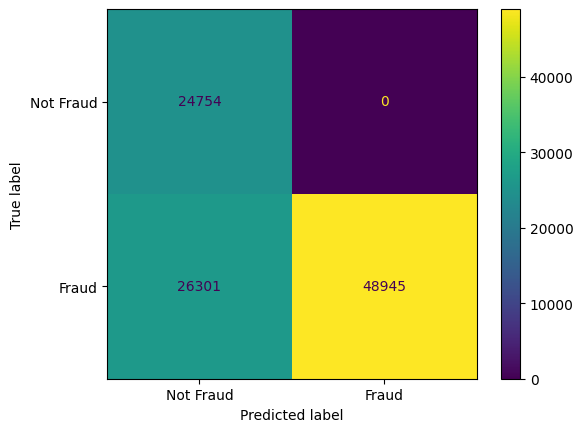

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf2,X_test,y_pred,display_labels=["Not Fraud","Fraud"])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.17      0.28     94956
           1       0.05      0.84      0.10      5044

    accuracy                           0.20    100000
   macro avg       0.50      0.51      0.19    100000
weighted avg       0.91      0.20      0.27    100000

